In [1]:
from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

In [3]:
df  = pd.read_csv('dataset.csv')

In [4]:
df

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch
...,...,...
21995,hors du terrain les années et sont des année...,French
21996,ใน พศ หลักจากที่เสด็จประพาสแหลมมลายู ชวา อินเ...,Thai
21997,con motivo de la celebración del septuagésimoq...,Spanish
21998,年月，當時還只有歲的她在美國出道，以mai-k名義推出首張英文《baby i like》，由...,Chinese


In [5]:
df['language'].value_counts()

Estonian      1000
Swedish       1000
English       1000
Russian       1000
Romanian      1000
Persian       1000
Pushto        1000
Spanish       1000
Hindi         1000
Korean        1000
Chinese       1000
French        1000
Portugese     1000
Indonesian    1000
Urdu          1000
Latin         1000
Turkish       1000
Japanese      1000
Dutch         1000
Tamil         1000
Thai          1000
Arabic        1000
Name: language, dtype: int64

In [6]:
ps = PorterStemmer()
corpus=[]

for i in range(len(df['Text'])):
    
    rev = re.sub("^[a-zA-Z]",' ', df['Text'][i]) 
    rev = rev.lower()
    rev = rev.split()
    rev = [ps.stem(word) for word in rev if set(stopwords.words())]
    rev = ' '.join(rev)
    corpus.append(rev)
    
    print(i,end='\r')
print()

21999


In [9]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=10000)
X = cv.fit_transform(corpus).toarray()

In [10]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
y = label.fit_transform(df['language'])

In [11]:
label.classes_

array(['Arabic', 'Chinese', 'Dutch', 'English', 'Estonian', 'French',
       'Hindi', 'Indonesian', 'Japanese', 'Korean', 'Latin', 'Persian',
       'Portugese', 'Pushto', 'Romanian', 'Russian', 'Spanish', 'Swedish',
       'Tamil', 'Thai', 'Turkish', 'Urdu'], dtype=object)

In [12]:
data1 = pd.DataFrame(np.c_[corpus,y],columns=['Sentence','Language'])

In [13]:
data1

,Sentence,Language
0,lement gottwaldi surnukeha palsameer ning paig...,4
1,ebe joseph pereira thoma på eng the jesuit and...,17
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,19
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,18
4,e spon behoort tot het geslacht haliclona en b...,2
...,...,...
21995,or du terrain le anné et sont de anné de crise...,5
21996,ใน พศ หลักจากที่เสด็จประพาสแหลมมลายู ชวา อินเด...,19
21997,on motivo de la celebración del septuagésimoqu...,16
21998,年月，當時還只有歲的她在美國出道，以mai-k名義推出首張英文《babi i like》，由...,1


In [14]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [16]:
from sklearn.naive_bayes import MultinomialNB

In [17]:
classifier = MultinomialNB().fit(X_train,y_train)

In [18]:
pred = classifier.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score,confusion_matrix
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))

0.923409090909091
[[193   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0  62   0  17 112   3   0   0   0   0   0   0   0   0   0   0   2   0
    0   0   1   0]
 [  0   0 202   3   0   2   0   0   0   0   1   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   1   0 199   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   0   2 171   1   0   0   0   0   0   0   0   0   0   1   0   0
    0   0   1   0]
 [  0   0   0   1   0 195   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   0   4   0   0 188   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   0   1   0   0   0 191   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0  12   0   8  88   3   0   0  65   0   0   0   0   0   1   1   3   1
    0   0   0   0]
 [  0   0   0   0   4   0   0   0   0 200   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   0  11   0   1   0   0   0   0 186   0   

<Axes: >

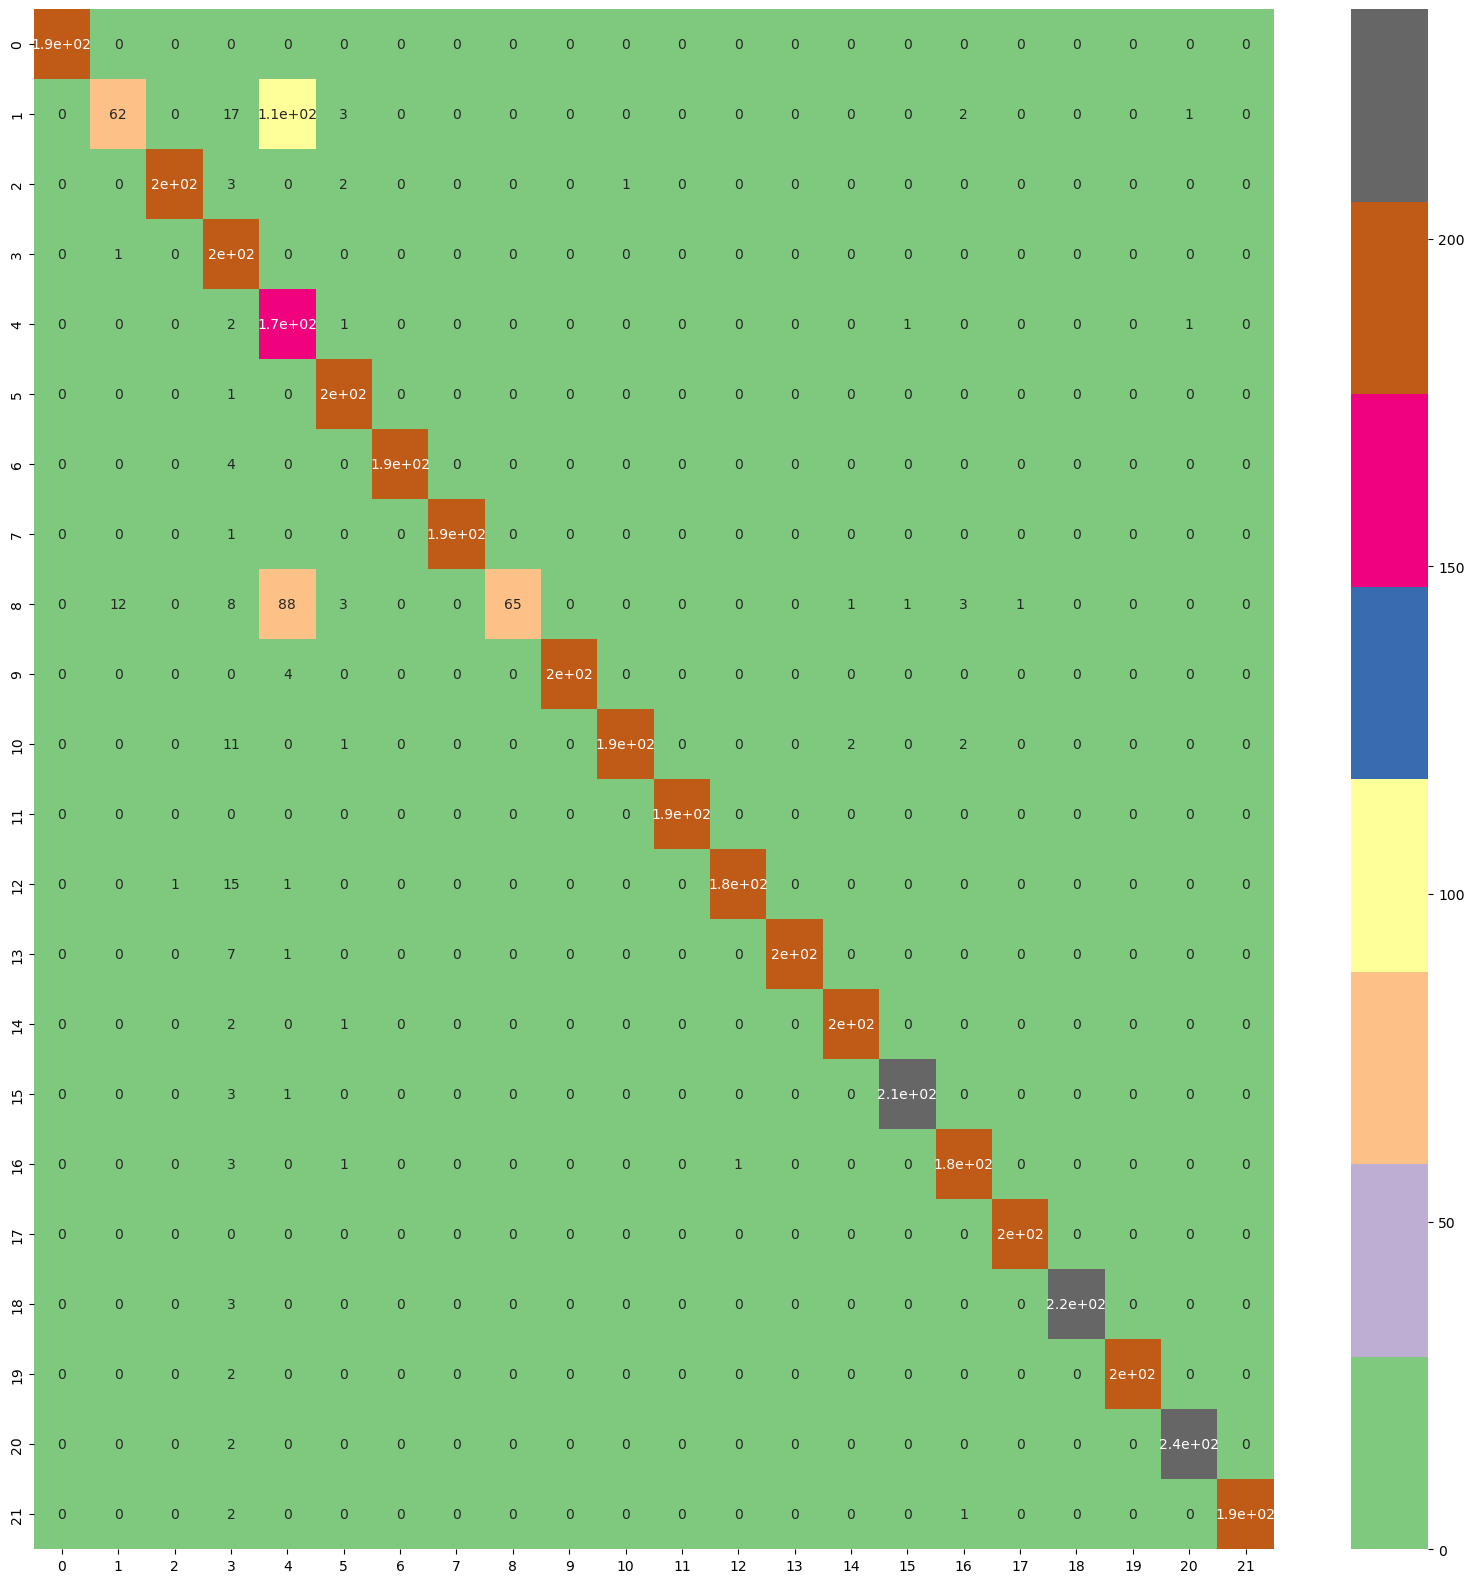

In [21]:
plt.figure(figsize=(20,20))
sns.heatmap(confusion_matrix(y_test,pred),annot=True,cmap=plt.cm.Accent)

In [24]:
def test_model(test_sentence):
    languages = {
    'Arabic' : 0,
    'Chinese' : 1,
    'Dutch' : 2,
    'English' : 3,
    'Estonian' : 4,
    'French' : 5,
    'Hindi' : 6,
    'Indonesian' : 7,
    'Japanese' : 8,
    'Korean' : 9,
    'Latin' : 10,
    'Persian' : 11,
    'Portugese' : 12,
    'Pushto' : 13,
    'Romanian' : 14,
    'Russian' : 15,
    'Spanish' : 16,
    'Swedish' : 17,
    'Tamil' : 18,
    'Thai' : 19,
    'Turkish' : 20,
    'Urdu' : 21
    }
    
    
    
    
    rev = re.sub('^[a-zA-Z]',' ',test_sentence)
    rev = rev.lower()
    rev = rev.split()
    rev = [ps.stem(word) for word in rev if word not in set(stopwords.words())]
    rev = ' '.join(rev)
    
    rev = cv.transform([rev]).toarray()
    
    output = classifier.predict(rev)[0]
    
    keys = list(languages)
    values = list(languages.values())
    position = values.index(output)
    
    output = keys[position]
    
    print(output)

In [25]:
test_model('विपदाएं आते ही खुलकर तन जाता है')

Hindi


In [26]:
test_model('le français.')

French
